In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from  matplotlib import pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [5]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = "columns")

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
tenure_churn_no = df[df["Exited"] == 0].Tenure
tenure_churn_yes = df[df["Exited"] == 1].Tenure
tenure_churn_no

1        1
3        1
4        2
6        7
8        4
        ..
9993     7
9994     2
9995     5
9996    10
9999     4
Name: Tenure, Length: 7963, dtype: int64

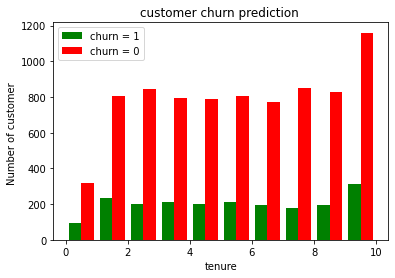

In [12]:
plt.xlabel("tenure")
plt.ylabel("Number of customer ")
plt.title("customer churn prediction ")
plt.hist([tenure_churn_yes,tenure_churn_no], color = ["green", "red"], label = ["churn = 1", "churn = 0"])
plt.legend()

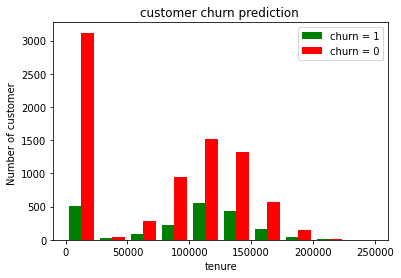

In [13]:
tenure_churn_no = df[df["Exited"] == 0].Balance
tenure_churn_yes = df[df["Exited"] == 1].Balance
tenure_churn_no
plt.xlabel("tenure")
plt.ylabel("Number of customer ")
plt.title("customer churn prediction ")
plt.hist([tenure_churn_yes,tenure_churn_no], color = ["green", "red"], label = ["churn = 1", "churn = 0"])
plt.legend()

In [14]:
def unique_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f' {column}: {df[column].unique()}')

In [15]:
unique_values(df)

 Geography: ['France' 'Spain' 'Germany']
 Gender: ['Female' 'Male']


In [16]:
df.replace({"Female": 1, "Male":0}, inplace = True)

In [18]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df1 = pd.get_dummies(data = df, columns = ["Geography"])

In [22]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [24]:
cols_to_scale = ["Tenure","EstimatedSalary","Age", "Balance"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [26]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2997,655,1,0.108108,0.7,0.423273,1,0,1,0.160059,0,1,0,0
233,767,0,0.027027,0.3,0.477143,2,0,1,0.750691,0,0,1,0
5840,616,0,0.716216,0.4,0.000000,2,1,1,0.868022,0,0,0,1


In [28]:
X = df1.drop("Exited", axis = "columns")
Y = df1.Exited

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 10)

In [41]:
X_train.shape

(8000, 12)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (12,), activation = "relu" ),
     #keras.layers.Dense(15,  activation = "relu" ),
      keras.layers.Dense(1, activation = "sigmoid" )
])
    
    
model.compile(optimizer = "adam",
            loss = "binary_crossentropy",
          metrics = ["accuracy"]  
             )
              
model.fit(X_train, Y_train, epochs = 50)

Epoch 1/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7912
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7976
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7947
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7983
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8023
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7972
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8002
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7980
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8049
Epoch 10/50
250/250 [==============================] - 0s 878us/step - loss: 0.4708 - accuracy: 0.79

In [43]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7965


[0.4762282967567444, 0.796500027179718]

In [44]:
yp = model.predict(X_test)
yp

array([[0.15273267],
       [0.13128531],
       [0.22942767],
       ...,
       [0.11976659],
       [0.3203544 ],
       [0.03706118]], dtype=float32)

In [45]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [46]:
Y_test[:5]

937     0
9355    0
2293    1
192     0
8675    0
Name: Exited, dtype: int64

In [47]:
from sklearn.metrics import  classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1578
           1       0.67      0.07      0.13       422

    accuracy                           0.80      2000
   macro avg       0.73      0.53      0.51      2000
weighted avg       0.77      0.80      0.73      2000



Text(69.0, 0.5, 'Truth')

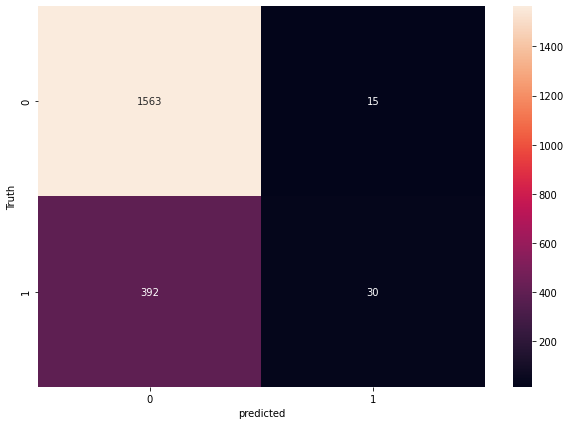

In [48]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions =y_pred)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted")
plt.ylabel("Truth")